In [1]:
import missingno

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Основы машинного обучения
## Семинар 5. Валидация данных и оценка моделей
### Данные

Источник: [kaggle](https://www.kaggle.com/datasets/prakashraushan/loan-dataset).

#### Посмотрим на данные в целом

In [2]:
class_df = pd.read_csv('loans.csv')
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [3]:
class_df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


Пропущенные значения

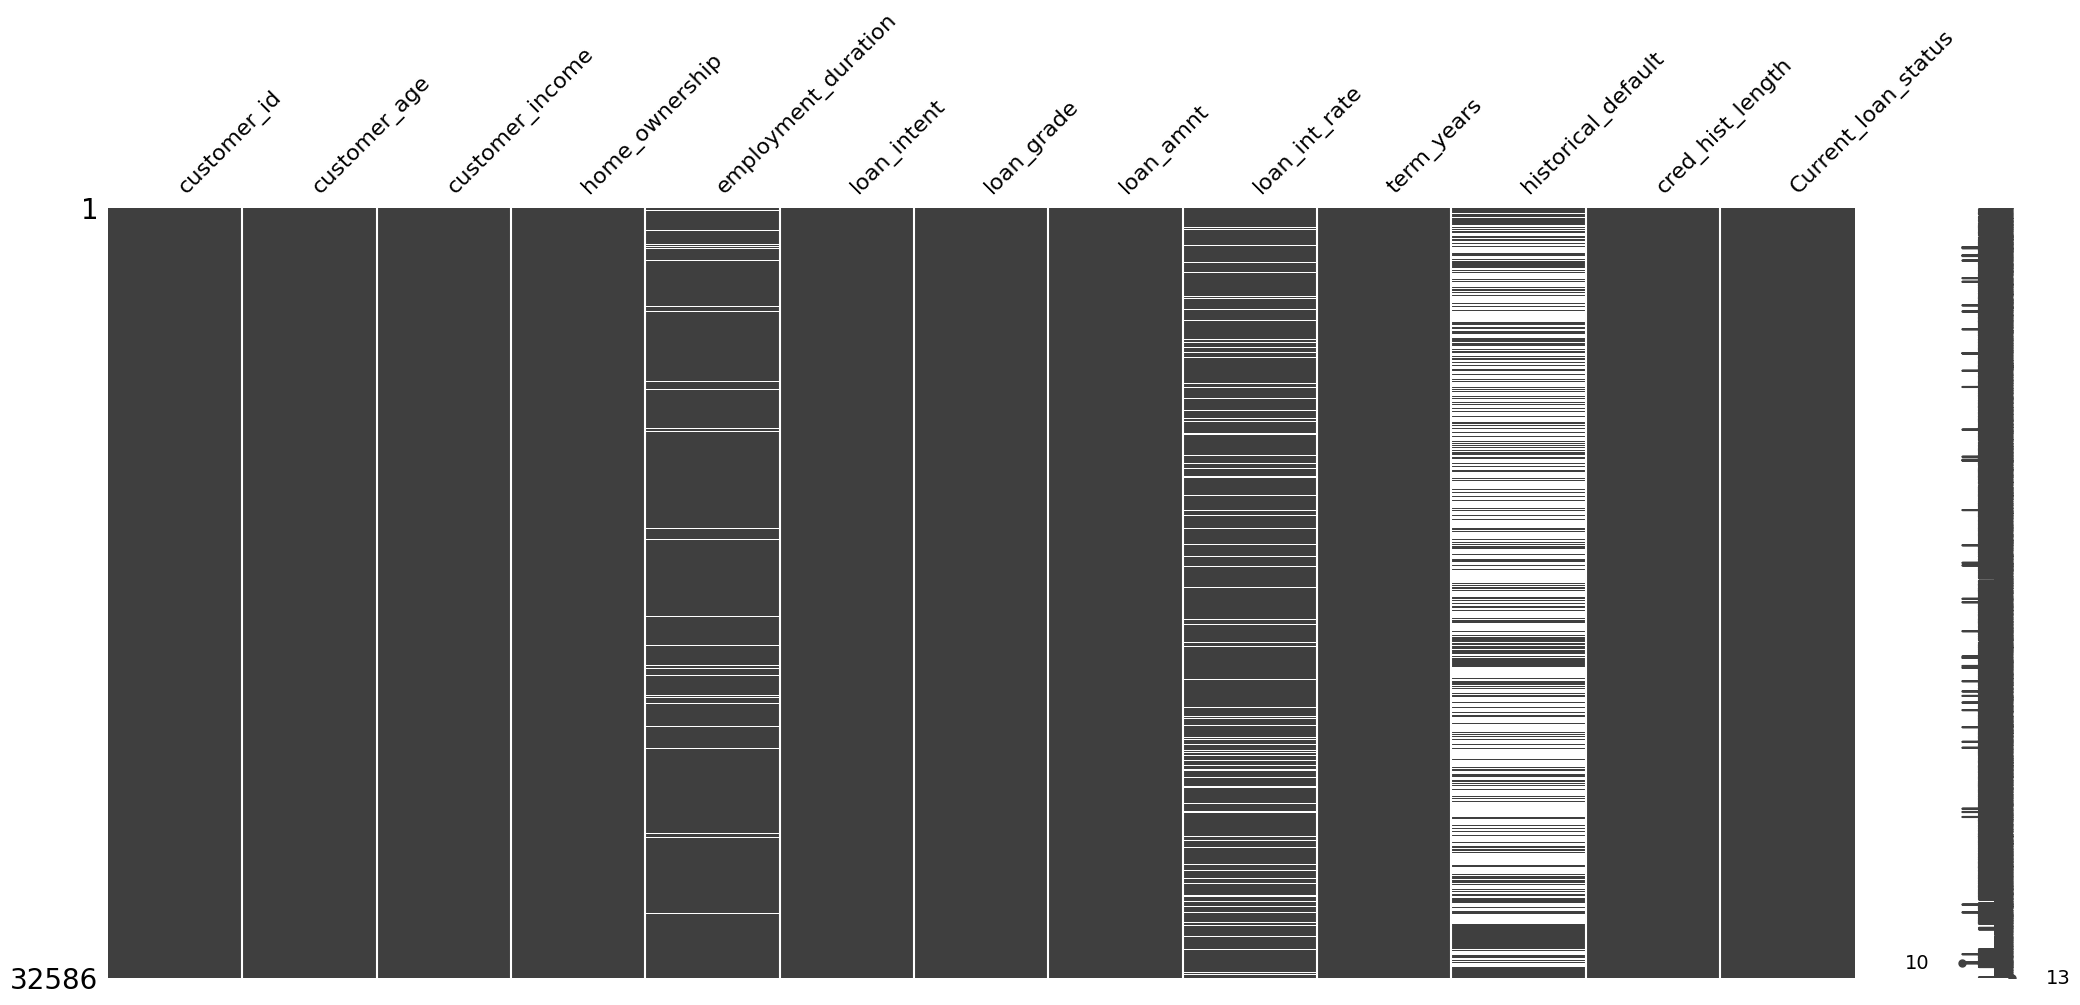

In [4]:
missingno.matrix(class_df);

In [5]:
class_df.isna().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [6]:
# customer_id -> эта колонка нас не интересует
# employment_duration -> скорее всего, 0
# loan_amnt, loan_int_rate, Current_loan_status (target) -> критически важно, точно надо фильтровать
# historical_default -> скорее всего, NaN - не применимо (не брал заем ранее)

Дубликаты

In [7]:
class_df.duplicated().any()

True

In [8]:
columns_drop_na = ['loan_amnt', 'loan_int_rate', 'Current_loan_status']

# \ - переход на новую строку без разрыва (иначе будет SyntaxError)
class_data = class_df.dropna(subset=columns_drop_na)\
    .drop_duplicates(ignore_index=True)\
    .drop(columns=['customer_id'])

#### Посмотрим на переменные по отдельности

In [9]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


`customer_age`

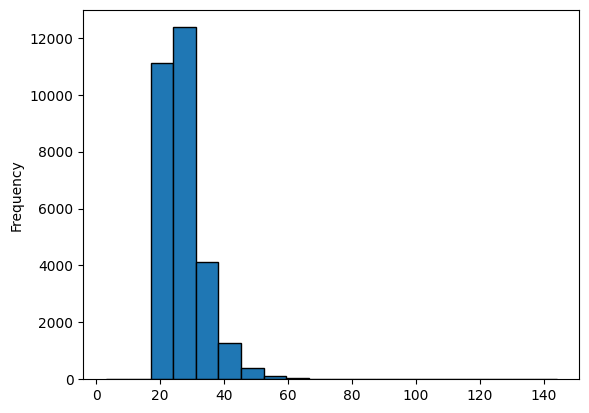

In [10]:
class_data['customer_age'].plot.hist(edgecolor='black', bins=20);

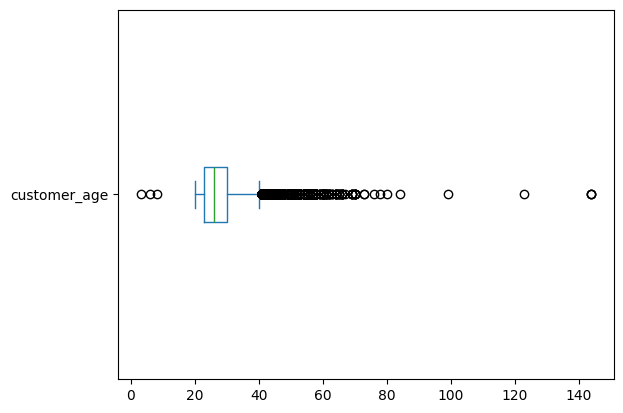

In [11]:
class_data['customer_age'].plot.box(vert=False);

In [12]:
customer_age_filter = (class_data['customer_age'].values >= 18) & (class_data['customer_age'].values < 100)

`customer_income`

In [13]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [14]:
# только запятые в середине (59,000 -> 59000) мешают преобразованию в float
class_data['customer_income'].str.replace(',', '.').astype(float)

0         59000.0
1          9600.0
2          9600.0
3         65500.0
4         54400.0
           ...   
29456     53000.0
29457    120000.0
29458     76000.0
29459    150000.0
29460     42000.0
Name: customer_income, Length: 29461, dtype: float64

In [15]:
class_data['customer_income'] = class_data['customer_income'].str.replace(',', '.').astype(float)

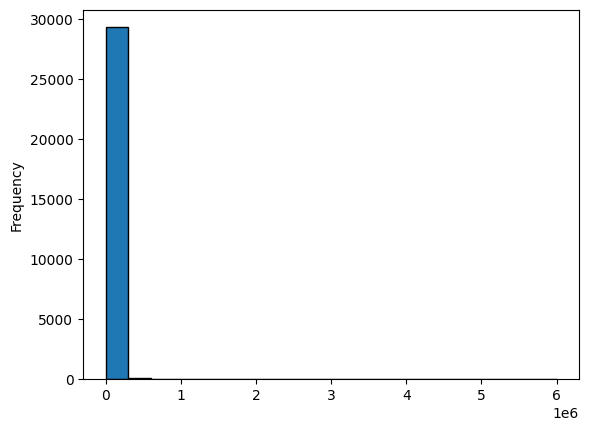

In [16]:
class_data['customer_income'].plot.hist(edgecolor='black', bins=20);

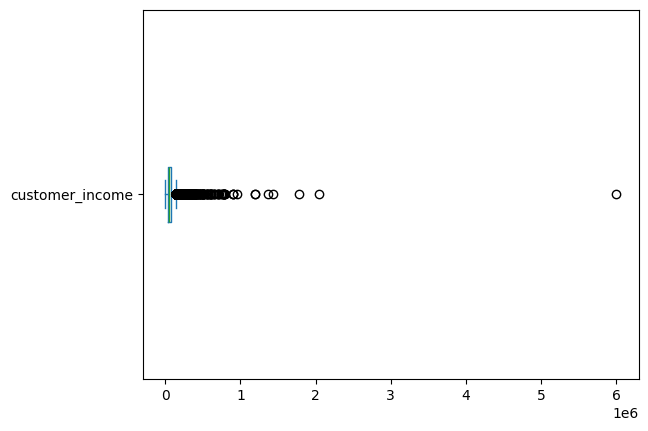

In [17]:
class_data['customer_income'].plot.box(vert=False);

In [18]:
class_data['customer_income_log'] = np.log(class_data['customer_income'].values)

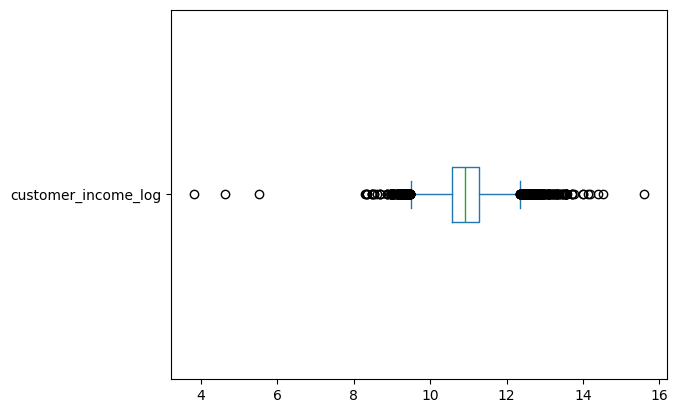

In [19]:
class_data['customer_income_log'].plot.box(vert=False);

In [20]:
customer_income_filter = class_data['customer_income_log'].values >= 7

`home_ownership`

In [21]:
class_data['home_ownership'].value_counts()  # OTHER слишком мало, следует отфильтровать

home_ownership
RENT        14891
MORTGAGE    12121
OWN          2355
OTHER          94
Name: count, dtype: int64

In [22]:
home_ownership_filter = class_data['home_ownership'].values != 'OTHER'

`employment_duration`

In [23]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log
0,22,59000.0,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT,10.985293
1,21,9600.0,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT,9.169518
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT,9.169518
3,23,65500.0,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT,11.089805
4,24,54400.0,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT,10.904119


In [24]:
class_data['employment_duration'].isna().sum()

827

In [25]:
class_data['employment_duration'] = class_data['employment_duration'].fillna(0)

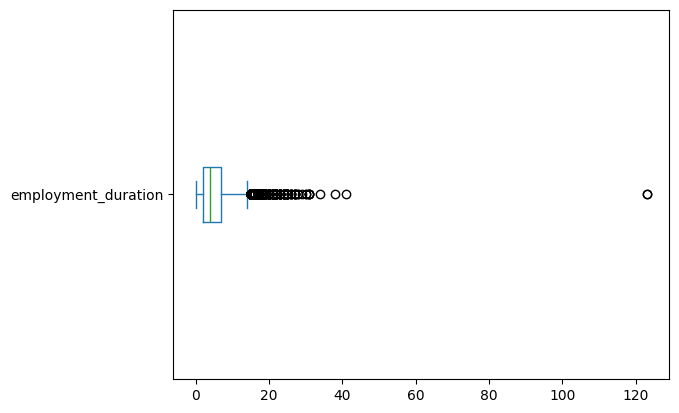

In [26]:
class_data['employment_duration'].plot.box(vert=False);  # кажется, попытались оформить кредит на уже умершего человека

In [27]:
employment_duration_filter = class_data['employment_duration'].values < 60

`loan_intent`

In [28]:
class_data['loan_intent'].value_counts()  # все хорошо

loan_intent
EDUCATION            5854
MEDICAL              5451
VENTURE              5151
PERSONAL             5012
DEBTCONSOLIDATION    4703
HOMEIMPROVEMENT      3290
Name: count, dtype: int64

`loan_grade`

In [29]:
class_data['loan_grade'].value_counts()  # все хорошо

loan_grade
A    14183
B     8130
C     4461
D     2414
E      273
Name: count, dtype: int64

`loan_amnt`

In [30]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log
0,22,59000.0,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT,10.985293
1,21,9600.0,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT,9.169518
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT,9.169518
3,23,65500.0,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT,11.089805
4,24,54400.0,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT,10.904119


In [31]:
class_data['loan_amnt'] = class_data['loan_amnt'].str.strip('£').str.replace(',', '').astype(float)

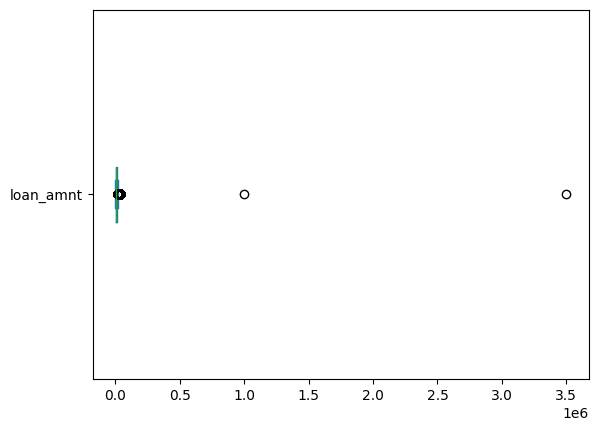

In [32]:
class_data['loan_amnt'].plot.box(vert=False);

In [33]:
class_data['loan_amnt_log'] = np.log(class_data['loan_amnt'].values)

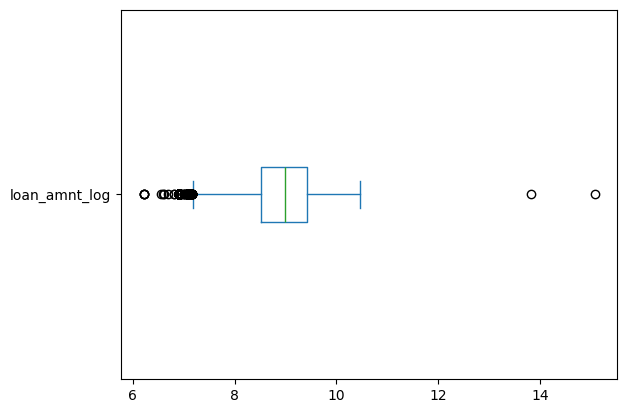

In [34]:
class_data['loan_amnt_log'].plot.box(vert=False);

In [35]:
loan_amnt_filter = class_data['loan_amnt_log'].values < 12

`loan_int_rate`

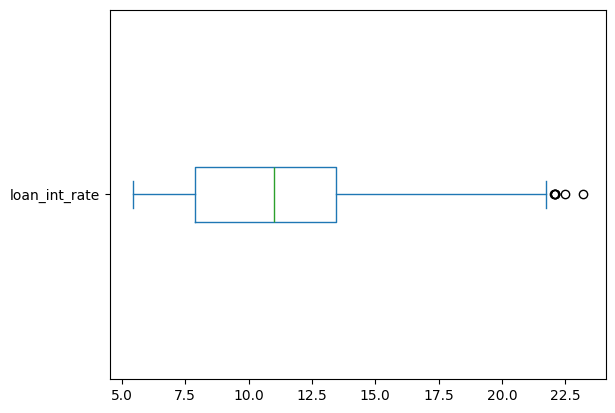

In [36]:
class_data['loan_int_rate'].plot.box(vert=False);  # все хорошо

`term_years`

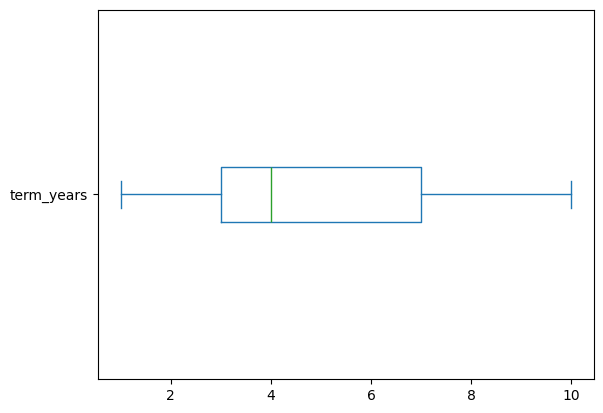

In [37]:
class_data['term_years'].plot.box(vert=False);  # все хорошо

`historical_default`

In [38]:
class_data['historical_default'].value_counts()

historical_default
Y    5561
N    5169
Name: count, dtype: int64

In [39]:
class_data['historical_default'] = class_data['historical_default'].fillna('NOT_APPLICABLE')

In [40]:
class_data['historical_default'].value_counts()

historical_default
NOT_APPLICABLE    18731
Y                  5561
N                  5169
Name: count, dtype: int64

`cred_hist_length`

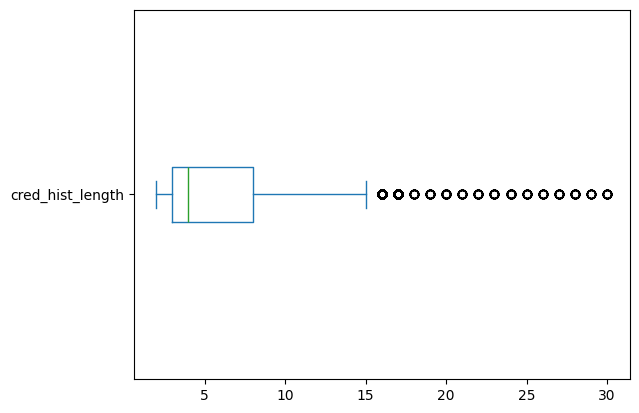

In [41]:
class_data['cred_hist_length'].plot.box(vert=False);  # выбросы как будто есть, но их много, фильтровать лично я бы не стал

`Current_loan_status`

In [42]:
class_data['Current_loan_status'].value_counts()

Current_loan_status
NO DEFAULT    23237
DEFAULT        6224
Name: count, dtype: int64

In [43]:
class_data['Current_loan_status'].value_counts(normalize=True)

Current_loan_status
NO DEFAULT    0.788738
DEFAULT       0.211262
Name: proportion, dtype: float64

In [44]:
class_data['target'] = 0
class_data.loc[class_data['Current_loan_status'] == 'DEFAULT', 'target'] = 1

### Подготовим данные к моделированию

In [45]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log,target
0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT,10.985293,10.463103,1
1,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NOT_APPLICABLE,2,NO DEFAULT,9.169518,6.907755,0
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT,9.169518,8.612503,1
3,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT,11.089805,10.463103,1
4,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT,10.904119,10.463103,1


In [46]:
variables = [
    'customer_age', 'customer_income_log', 'home_ownership', 'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt_log', 'loan_int_rate', 'term_years', 'historical_default',
    'cred_hist_length', 'target'
]

dummy_variables = ['home_ownership', 'loan_intent', 'loan_grade', 'historical_default']
target = 'target'

model_data = class_data.loc[
    customer_age_filter
    & customer_income_filter
    & home_ownership_filter
    & employment_duration_filter
    & loan_amnt_filter,
    variables
].reset_index(drop=True)

model_data = pd.get_dummies(
    model_data,
    columns=dummy_variables,
    dtype='int',
    drop_first=True
)

Уже знакомый нам подход: берем только нужные переменные, применяем фильтры и создаем дамми-фичи

In [47]:
model_data.head()

,customer_age,customer_income_log,employment_duration,loan_amnt_log,loan_int_rate,term_years,cred_hist_length,target,home_ownership_OWN,home_ownership_RENT,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,historical_default_NOT_APPLICABLE,historical_default_Y
0,21,9.169518,5.0,6.907755,11.14,1,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,25,9.169518,1.0,8.612503,12.87,5,3,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,23,11.089805,4.0,10.463103,15.23,10,2,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3,24,10.904119,8.0,10.463103,14.27,10,4,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,21,9.200290,2.0,7.824046,7.14,1,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
X = model_data.drop(columns=[target])
y = model_data[target]

### Разбиение данных
#### train & test
**Задание 1.** Реализуйте собственную функцию `train_test_split`, которая будет делать то же самое, что и оригинальная из `sklearn` (без логики аргументов `random_state` и `stratify`). Дополнительное требование: функция должна уметь принимать неограниченное число массивов к разбиению.

In [49]:
# X
# col1 col2
# 1     2
# 3     4

# y
# 0
# 1

In [50]:
def train_test_split_custom(*args, train_size=0.7) -> list:
    row_number = args[0].shape[0]
    permuted_indices = np.random.permutation(row_number)

    cutoff_index = int(row_number * train_size)

    to_return = []

    for data in args:
        data_permuted = data[permuted_indices]
        data_train, data_test = data_permuted[:cutoff_index], data_permuted[cutoff_index:]

        to_return.extend([data_train, data_test])
            
    return to_return

**Стандартизация (и не только) и утечка данных**<br>
Перед тем, как проверять качество вашей модели на `train` и `test`, проведите стандартизацию необходимых признаков. Напишите функцию, которая принимала бы на вход `train` и `test` массивы фичей и возвращала бы преобразованные данные. Можно воспользоваться классом `StandardScaler`.

In [52]:
(X['customer_age'] - X['customer_age'].mean()) / X['customer_age'].std()

0        -1.085602
1        -0.437567
2        -0.761584
3        -0.599575
4        -1.085602
           ...    
29348     4.746715
29349     4.260688
29350     6.042785
29351     4.584706
29352    11.551084
Name: customer_age, Length: 29353, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler

def standardize(train, test):
    sc = StandardScaler()

    train_scaled = sc.fit_transform(train)
    test_scaled = sc.transform(test)

    return train_scaled, test_scaled

In [ ]:
# (x - x.min()) / (x.max() - x.min()) - только по отдельности

In [ ]:
# np.log([1, 2, 3]) - на всей выборке

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Приведите пример преобразования данных, при котором НЕ нужно беспокоиться об утечке данных.

Теперь проверьте качество на train и test. В качестве модели используйте логистическую регрессию с взвешенными классами.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

predict_train = logreg.predict(X_train)
predict_test = logreg.predict(X_test)

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
accuracy_score(y_train, predict_train), accuracy_score(y_test, predict_test)

(0.9041973289724721, 0.8991688240904755)

In [57]:
# baseline accuracy
y_train.value_counts(normalize=True).loc[0], y_test.value_counts(normalize=True).loc[0]

(0.7896792949940946, 0.7873007221692329)

**Дополнительно.** Существует еще один способ оценить "базовую" пригодность модели для целей классификации, а также оценить, как она ведет себя при разной степени "уверенности". Алгоритм следующий:

1. Отсортируйте предсказанные вероятности в вашей модели по возрастанию;
2. Разделите этот массив на N частей (по дефолту 10);
3. Для каждой части посчитайте долю положительного класса;
4. Постройте график, показывающий взаимосвязь между построенными промежутками и подсчитанной долей.

In [58]:
def cut(array: np.ndarray, n=10) -> np.ndarray:
    cuts = np.linspace(array.min(), array.max(), n + 1).reshape((n + 1, 1))
    array_cut = (array >= cuts)[:-1, :].sum(axis=0)

    return array_cut

In [59]:
predict_train_proba = logreg.predict_proba(X_train)[:, 1]
predict_test_proba = logreg.predict_proba(X_test)[:, 1]

In [60]:
predict_train_proba.round(2)

array([0.  , 0.  , 0.  , ..., 1.  , 0.54, 0.99])

In [61]:
predict_train_groups = cut(predict_train_proba, n=10)

In [62]:
probabilities_train = pd.DataFrame(
    {
        'probs_train': predict_train_proba,
        'y_train': y_train.values,
    }
)
probabilities_train = probabilities_train.sort_values(by='probs_train', ignore_index=True)
probabilities_train['probs_groups'] = cut(probabilities_train['probs_train'].values, n=10)

probabilities_train = probabilities_train.groupby('probs_groups', as_index=False)['y_train'].mean()

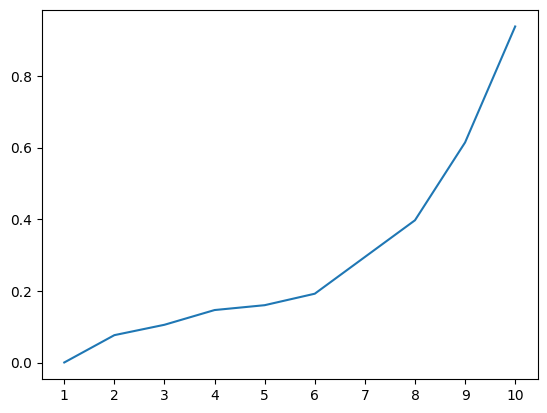

In [63]:
fig, ax = plt.subplots()

ax.plot(probabilities_train['probs_groups'], probabilities_train['y_train'])
ax.set_xticks(probabilities_train['probs_groups'], probabilities_train['probs_groups']);

In [64]:
probabilities_test = pd.DataFrame(
    {
        'probs_test': predict_test_proba,
        'y_test': y_test.values,
    }
)
probabilities_test = probabilities_test.sort_values(by='probs_test', ignore_index=True)
probabilities_test['probs_groups'] = cut(probabilities_test['probs_test'].values, n=10)

probabilities_test = probabilities_test.groupby('probs_groups', as_index=False)['y_test'].mean()

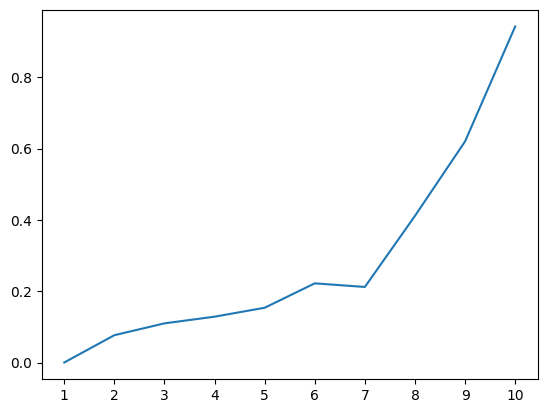

In [65]:
fig, ax = plt.subplots()

ax.plot(probabilities_test['probs_groups'], probabilities_test['y_test'])
ax.set_xticks(probabilities_test['probs_groups'], probabilities_test['probs_groups']);

**Задание 2.** Как вы думаете, в чем главный недостаток такого способа валидации модели? Как можно было бы его преодолеть?

In [66]:
def compute_metrics(X_train, X_test, y_train, y_test, model) -> tuple:
    predict_train = model.predict(X_train)
    predict_train_proba = model.predict_proba(X_train)

    predict_test = model.predict(X_test)
    predict_test_proba = model.predict_proba(X_test)

    train_metrics = {
        'accuracy': accuracy_score(y_train, predict_train),
        'precision': precision_score(y_train, predict_train),
        'recall': recall_score(y_train, predict_train),
        'roc_auc': roc_auc_score(y_train, predict_train_proba[:, 1]),
    }

    test_metrics = {
        'accuracy': accuracy_score(y_test, predict_test),
        'precision': precision_score(y_test, predict_test),
        'recall': recall_score(y_test, predict_test),
        'roc_auc': roc_auc_score(y_test, predict_test_proba[:, 1]),
    }

    return train_metrics, test_metrics

In [67]:
accuracy_score(y_train, predict_train), accuracy_score(y_test, predict_test)

(0.9041973289724721, 0.8991688240904755)

In [68]:
train_metrics = []
test_metrics = []

N = 100

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    logreg = LogisticRegression(class_weight='balanced')
    logreg.fit(X_train, y_train)
    
    trm, ttm = compute_metrics(X_train, X_test, y_train, y_test, logreg)

    train_metrics.append(trm['accuracy'])
    test_metrics.append(ttm['accuracy'])

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

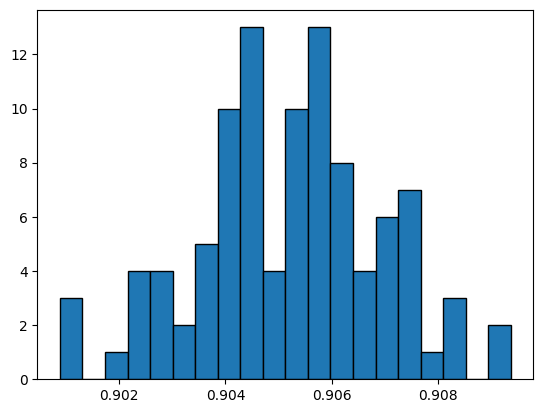

In [69]:
fig, ax = plt.subplots()

ax.hist(train_metrics, bins=20, edgecolor='black');

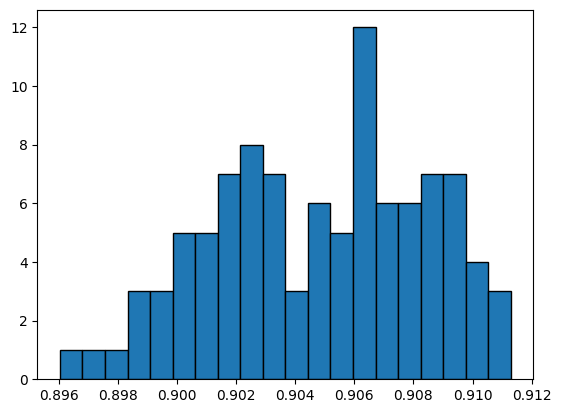

In [70]:
fig, ax = plt.subplots()

ax.hist(test_metrics, bins=20, edgecolor='black');

Видите ли вы какие-нибудь минусы в предложенном вами решении?

#### KFold
**Задание 3**

Изучите распределение метрики accuracy при использовании `KFold` с количеством фолдов `50`. Какие выводы об однородности данных можно сделать? Постройте доверительный интервал для указанной метрики.

In [76]:
from sklearn.model_selection import KFold

kf = KFold(
    n_splits=50
)

train_metrics = []
test_metrics = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index, :], y.iloc[train_index], y.iloc[test_index]
    
    logreg = LogisticRegression(class_weight='balanced')
    logreg.fit(X_train, y_train)
    
    trm, ttm = compute_metrics(X_train, X_test, y_train, y_test, logreg)

    train_metrics.append(trm['accuracy'])
    test_metrics.append(ttm['accuracy'])

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

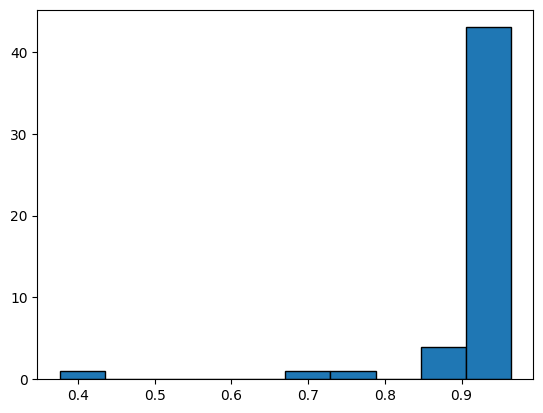

In [78]:
fig, ax = plt.subplots()

ax.hist(test_metrics, bins=10, edgecolor='black');  # можно отметить, что хотя данные в целом однородны, в них (как и в любых) есть выделяющиеся "куски", на которых модель ведет себя плохо

**Задание 4**

Поговорим о подборе оптимального порога. Разделите ваши данные на `train`, `test` и `validation` части. Обучите модель на `train`, подберите порог на `test`, используя PR-кривую. Проверьте качество (метрика `f1_score`) на `validation`.

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score

def train_test_val_indices(size, train_size, test_size):
    indices_permuted = np.random.permutation(size)

    cut_train_test = int(train_size * size)
    cut_test_val = int((train_size + test_size) * size)

    indices_train, indices_test, indices_val = indices_permuted[:cut_train_test], indices_permuted[cut_train_test:cut_test_val], indices_permuted[cut_test_val:]

    return indices_train, indices_test, indices_val

In [80]:
i_train, i_test, i_val = train_test_val_indices(y.values.size, 0.6, 0.2)

X_train, X_test, X_val, y_train, y_test, y_val = X.iloc[i_train].reset_index(drop=True), X.iloc[i_test].reset_index(drop=True), X.iloc[i_val].reset_index(drop=True),\
                                                    y.iloc[i_train].reset_index(drop=True), y.iloc[i_test].reset_index(drop=True), y.iloc[i_val].reset_index(drop=True)

In [82]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

predict_proba = logreg.predict_proba(X_test)[:, 1]

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
precisions = []
recalls = []
f1_scores = []

for cutoff in np.linspace(0, 1, 100)[::-1]:
    predict = (predict_proba >= cutoff).astype(int)
    
    pr = precision_score(y_test, predict)
    rec = recall_score(y_test, predict)
    f1sc = f1_score(y_test, predict)

    if pr != 0 and rec != 0:
        precisions.append(pr)
        recalls.append(rec)
        f1_scores.append(f1sc)

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


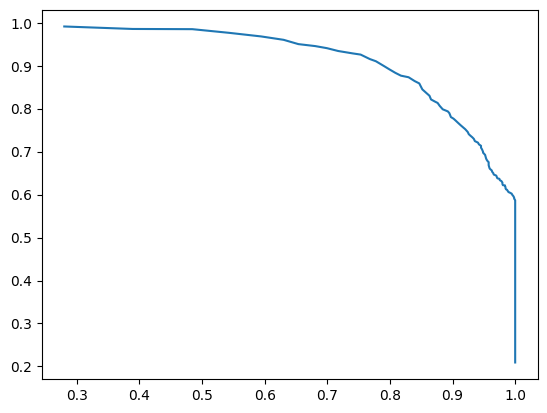

In [104]:
fig, ax = plt.subplots()

ax.plot(recalls, precisions);

In [111]:
# выберем значение порога, при котором f1_score максимальный
cutoff_best_ind = np.argmax(f1_scores)
cutoff_best = np.linspace(0, 1, 100)[::-1][cutoff_best_ind]

print(f'Best train f1score is {f1_scores[cutoff_best_ind]} (cutoff {cutoff_best})')

Best train f1score is 0.8528085280852808 (cutoff 0.797979797979798)


In [115]:
predict_val = (logreg.predict_proba(X_val)[:, 1] >= cutoff).astype(int)

In [116]:
f1_score(y_val, predict_val)  # на валидационной выборке, как видно, подобранное значение мягко говоря не очень. Чтобы получить более надежные результаты, следует повторить процедуру несколько
# раз

0.3575325220310533

**Задание 5**

Поиграем с глубиной дерева решений. Постройте кривую обучения для `train` и `test`, варьируя глубину дерева от 1 до 30. Проинтерпретируйте результаты.

In [120]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score = []

for depth in range(1, 31):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    predict_train = dt.predict(X_train)
    predict_test = dt.predict(X_test)

    score_train = f1_score(y_train, predict_train)
    score_test = f1_score(y_test, predict_test)
    
    train_score.append(score_train)
    test_score.append(score_test)

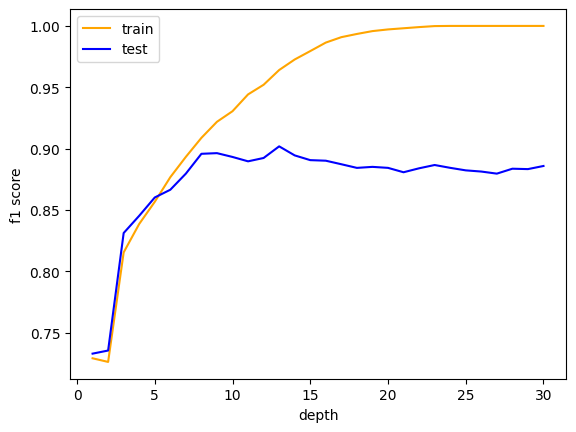

In [126]:
depths = [*range(1, 31)]

fig, ax = plt.subplots()

ax.plot(depths, train_score, color='orange', label='train');
ax.plot(depths, test_score, color='blue', label='test');

ax.set_xlabel('depth');
ax.set_ylabel('f1 score');

ax.legend();  # можно заметить, что делать глубину после 7 нет никакого смысла